1 .explain how u can implement ML in a real world application.
Ans : 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv(r'D:\gpu_libraries\assienment\bangluru\Bengaluru_House_Data.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


price

Mean of price column 112.5656265015015
Median of price column 72.0


d:\gpu_libraries\tensor_lib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


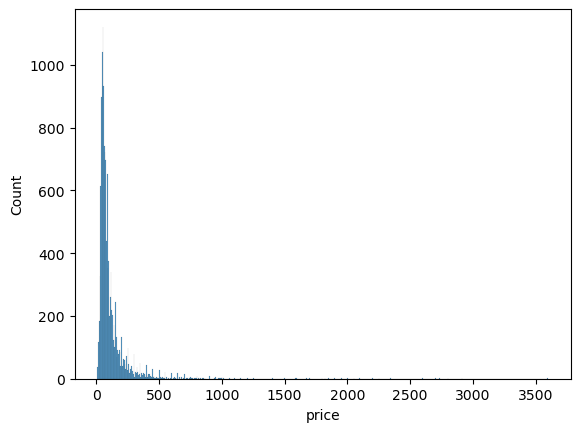

In [5]:
print("Mean of price column",df['price'].mean())
print("Median of price column",df['price'].median())
sns.histplot(df['price']);

area_type

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64


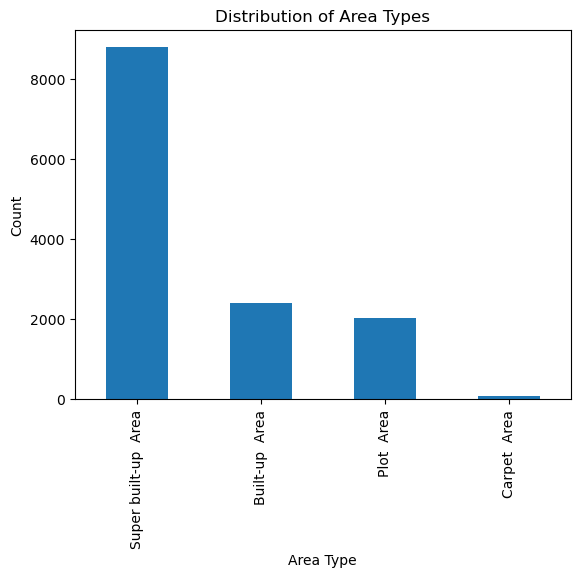

In [6]:

print(df['area_type'].value_counts())

df['area_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Area Types')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()

availability

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64


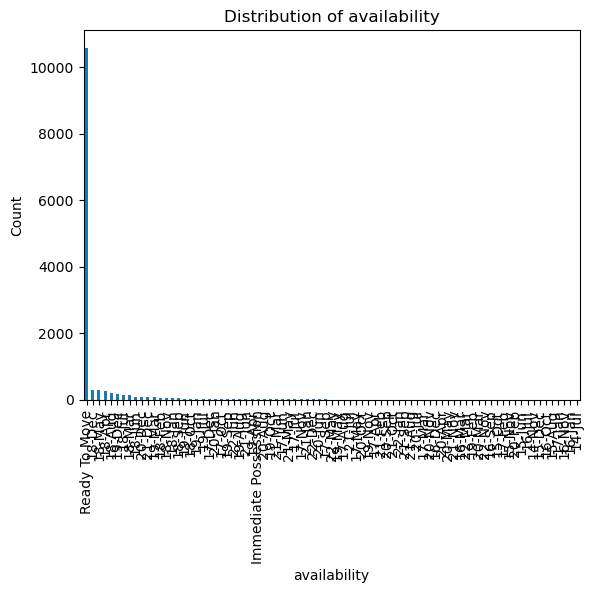

In [7]:
print(df['availability'].value_counts())

df['availability'].value_counts().plot(kind='bar')
plt.title('Distribution of availability')
plt.xlabel('availability')
plt.ylabel('Count')
plt.show()

It has dates as well as ready to move elements 


In [8]:
df['ready_to_move_indicator'] = (df['availability'] == 'Ready To Move').astype(int)

In [9]:
df['availability'] = df['availability'].replace('Ready To Move', str(0))

ready_to_move_indicator
1    10581
0     2739
Name: count, dtype: int64


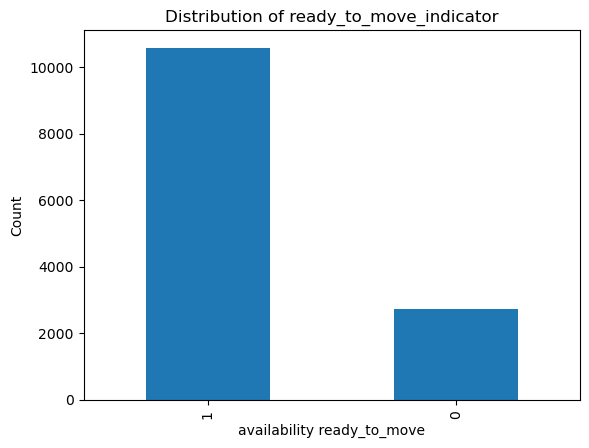

In [10]:
print(df['ready_to_move_indicator'].value_counts())

df['ready_to_move_indicator'].value_counts().plot(kind='bar')
plt.title('Distribution of ready_to_move_indicator')
plt.xlabel('availability ready_to_move')
plt.ylabel('Count')
plt.show()

availability
0         10581
18-Dec      307
18-May      295
18-Apr      271
18-Aug      200
          ...  
15-Aug        1
17-Jan        1
16-Nov        1
16-Jan        1
14-Jul        1
Name: count, Length: 81, dtype: int64


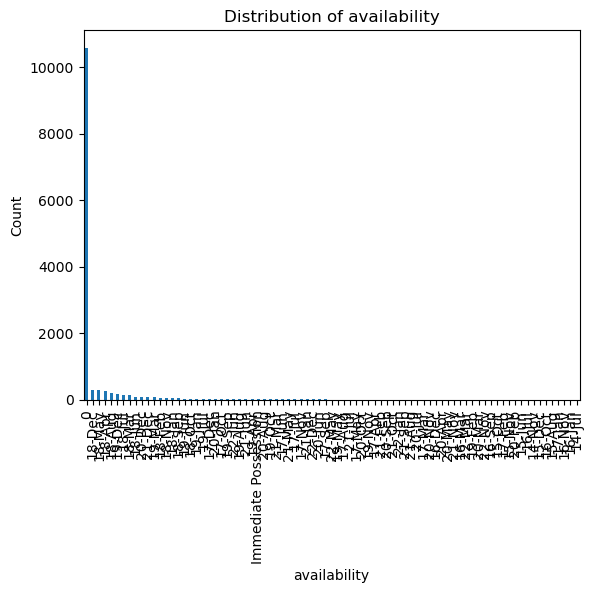

In [11]:
print(df['availability'].value_counts())

df['availability'].value_counts().plot(kind='bar')
plt.title('Distribution of availability')
plt.xlabel('availability')
plt.ylabel('Count')
plt.show()

In [12]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'ready_to_move_indicator'],
      dtype='object')

In [13]:
print(df['location'].value_counts().count())

1305


In [14]:
print(df['size'].value_counts().count())
df['size'].value_counts()

31


size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [15]:
X_train, X_test, y_train, y_test= train_test_split(df.drop(columns = ['price'],axis = 1),
                                                                            df['price'],
                                                                             test_size=0.2,
                                                                              random_state=42)

In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train= encoder1.fit_transform(X_train)
X_test= encoder1.transform(X_test)

In [19]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [21]:
predicted_values=model.predict(X_test)
result_mse = mean_squared_error(y_test, predicted_values)

print("REsult :", result_mse)
